In [31]:
import pandas as pd
import numpy as np

In [32]:
# Convert json files to dataframes
train = pd.read_json("datasets/train_dataset.json")
test = pd.read_json("datasets/test_dataset.json")
val = pd.read_json("datasets/val_dataset.json")
train_indices=train.index
test_indices=test.index
val_indices = val.index
data = pd.concat([train, test, val], axis=0)
train.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [33]:
# Replace columns name spaces with '_'
data.columns=data.columns.str.replace(' ', '_')
data.columns

Index(['graphic_card_type', 'communications', 'resolution_(px)', 'CPU_cores',
       'RAM_size', 'operating_system', 'drive_type', 'input_devices',
       'multimedia', 'RAM_type', 'CPU_clock_speed_(GHz)', 'CPU_model', 'state',
       'drive_memory_size_(GB)', 'warranty', 'screen_size', 'buynow_price'],
      dtype='object')

In [34]:
# Check for null values
data.isna().sum()

graphic_card_type         496
communications            782
resolution_(px)           608
CPU_cores                   0
RAM_size                  450
operating_system          650
drive_type                435
input_devices             678
multimedia                708
RAM_type                  864
CPU_clock_speed_(GHz)     936
CPU_model                 533
state                       0
drive_memory_size_(GB)    481
warranty                    0
screen_size               346
buynow_price                0
dtype: int64

In [35]:
# Change graphic card type to values
data.graphic_card_type = data.graphic_card_type.replace(to_replace=['dedicated graphics','integrated graphics'], 
                                                           value=[0,1])

In [36]:
import re
# Change communication strings to values
data.communications=data.communications.str.join('').map({'bluetoothlan 10/100/1000 mbps':1,
                                                         'wi-fibluetoothlan 10/100 mbps':2,
                                                         'bluetoothnfc (near field communication)':3,
                                                         'wi-fibluetooth':4,
                                                         'bluetoothlan 10/100 mbps':5,
                                                         'bluetoothlan 10/100/1000 mbpslan 10/100 mbpsin...':6,
                                                         })

In [37]:
data.communications

7233     1.0
5845     2.0
10303    3.0
10423    NaN
5897     4.0
        ... 
4433     NaN
9242     NaN
3982     5.0
9673     NaN
4277     5.0
Name: communications, Length: 7853, dtype: float64

In [38]:
# Change operating system strings to values
data.operating_system= data.operating_system.str.join('').map({'no system':0, 'windows 10 home':1})

In [39]:
# Change drive type values
data.drive_type=data.drive_type.map({'ssd + hdd':2, 'hdd':1, 'ssd':0})


In [40]:
data.input_devices.str.join('')

7233     keyboardtouchpadilluminated keyboardnumeric ke...
5845                      keyboardtouchpadnumeric keyboard
10303                                                 None
10423                                                 None
5897                  keyboardtouchpadilluminated keyboard
                               ...                        
4433                                      keyboardtouchpad
9242                                                  None
3982                                      keyboardtouchpad
9673                  keyboardtouchpadilluminated keyboard
4277                  keyboardtouchpadilluminated keyboard
Name: input_devices, Length: 7853, dtype: object

In [41]:
# Change input_devices to its values
data.input_devices=data.input_devices.str.join('').map({'keyboardtouchpadilluminated keyboardnumeric keyboard':3,
                                                        'keyboardtouchpadilluminated keyboard':4,
                                                       'keyboardtouchpadnumeric keyboard':2,
                                                       'keyboardtouchpad':1})

In [42]:
# Change multimedia to its values
data.multimedia=data.multimedia.str.join('').map({'SD card readercameraspeakersmicrophone':2,
                                 'SD card readercameramicrophone':1,'SD card reader':0})

In [43]:
# Change CPU model to its values
data.CPU_model=data.CPU_model.map({'intel core i7':2,'intel core i5':1, 'other CPU':0})

In [44]:
# Change warranty to 0 or 1
data.warranty=data.warranty.map({'producer warranty':1, 'seller warranty':0})

In [45]:
# Select highest value screen size 
data.screen_size= data.screen_size.str.join('').map({'17" - 17.9"':17.9, '15" - 15.9"':15.9,
                                                     '13" - 13.9"':13.9,'12" - 12.9"':12.9})

In [46]:
# Change RAM type to values
data.RAM_type=data.RAM_type.map({'ddr4':2,'ddr3':1, 'ddr3l':0})

In [47]:
# Change string into value=1
data.state=data.state.map({'new':1})

In [48]:
# Change string according to its RAM value
data.RAM_size=data.RAM_size.map({'32 gb':32, '8 gb':8, '4 gb':4})

In [49]:
# Select resolution at the highest range
data['resolution_(px)']=data['resolution_(px)'].map({'1366 x 768':1366, '1920 x 1080':1920, 
                                                     '2560 x 2560':2560})

In [51]:
features=['graphic_card_type', 'communications', 'resolution_(px)', 'CPU_cores',
       'RAM_size', 'operating_system', 'drive_type', 'input_devices',
       'multimedia', 'RAM_type', 'CPU_clock_speed_(GHz)', 'CPU_model', 'state',
       'drive_memory_size_(GB)', 'warranty', 'screen_size']
target='buynow_price'

In [52]:
data.CPU_cores=data.CPU_cores.str.join('').map({'4':4, '2':2, '6':6})

In [55]:
# Fill null values - mothod='ffill'
data.fillna(method='ffill', inplace = True)

In [56]:
data.astype('int')

,graphic_card_type,communications,resolution_(px),CPU_cores,RAM_size,operating_system,drive_type,input_devices,multimedia,RAM_type,CPU_clock_speed_(GHz),CPU_model,state,drive_memory_size_(GB),warranty,screen_size,buynow_price
7233,0,1,1920,4,32,0,2,3,2,2,2,2,1,1250,1,17,4999
5845,0,2,1366,4,8,1,0,2,2,1,2,2,1,256,0,15,2649
10303,0,3,1920,2,8,1,1,2,0,2,1,2,1,1000,1,15,3399
10423,0,3,1920,2,8,1,1,2,0,2,1,2,1,1000,1,15,1599
5897,1,4,1920,4,8,1,0,4,2,2,1,0,1,256,1,12,4499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,0,2,1366,4,8,0,2,1,2,2,2,2,1,1256,1,15,7936
9242,0,2,1366,6,8,0,2,1,2,2,2,2,1,1256,0,15,2890
3982,0,5,1920,2,4,0,0,1,2,2,2,2,1,240,1,15,2716
9673,0,5,1920,4,4,1,0,4,2,2,2,1,1,480,1,15,4319


In [57]:
train=data.loc[train_indices]
test=data.loc[test_indices]
val = data.loc[val_indices]

In [58]:
X_train,X_test,X_val= train[features], test[features],val[features]
y_train, y_test, y_val = train[target], test[target], val[target]

In [59]:
y_train.shape

(4711,)

In [60]:
# Dependencies
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

Linear : 1221.5620032950997
MLP : 1335.5729271897083
Decision Tree : 1265.961890134541
Random Forest : 1016.1714286019289
Extra Trees : 1059.1243438799202


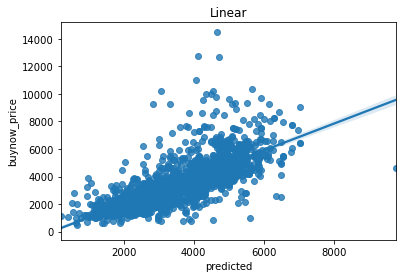

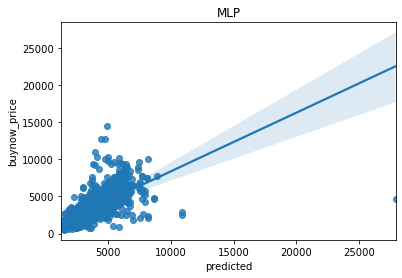

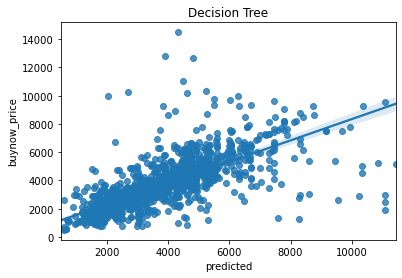

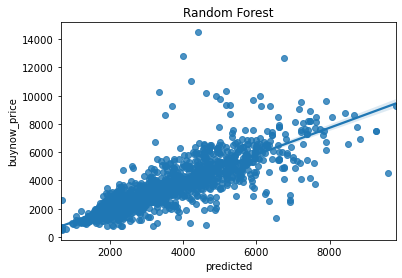

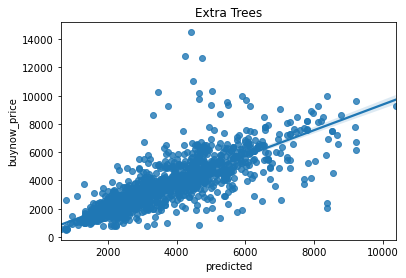

In [63]:
def make_models(model_name, model):
    pipe = make_pipeline(MaxAbsScaler(), model).fit(X_train, y_train)
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    print(model_name, ':', rmse_val)
    pred_df[model_name+'Pred']=predicted
    plt.figure(model_name)
    plt.title(model_name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test, x=predicted)
    
models = {'Linear' : LinearRegression(),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'Decision Tree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
#     'Gradient Boosting': GradientBoostingRegressor(random_state=42, criterion='squared_error',
#                                                   loss='squared_error',learning_rate=0.6, warm_start=True),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42)}

pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test

for key in models.keys():
    make_models(key, models[key])

In [64]:
pred_df

,Actual,LinearPred,MLPPred,Decision TreePred,Random ForestPred,Extra TreesPred
5124,2369.0,3159.965266,3214.463324,2343.428571,2324.570000,2283.170000
9595,2299.0,2758.460318,2995.766115,2415.250000,2346.900000,2299.000000
4926,5999.0,4979.141315,5183.013460,4524.000000,4910.162857,4830.000000
2607,3399.0,3153.554880,3752.694693,3199.000000,3799.372367,3754.026900
1185,1299.0,1583.896128,1648.233231,1464.898305,1292.553571,1274.000000
...,...,...,...,...,...,...
4741,5589.0,5287.553799,5703.104492,5596.231000,5628.822606,5653.750000
10057,5399.0,5522.098262,7747.078581,9450.000000,7109.053007,8021.610600
6980,8678.0,6419.598170,6403.516379,5255.666667,5273.645916,5255.666667
4480,4722.0,4733.452718,4831.506532,6159.000000,5769.284215,5463.719905
